

### Exercise Notebook: Machine Learning and Ensemble Methods on MRI Data for AD and CN Classification

### 1. Feature Exploration and Visualization

#### Exercise 1.1: Plot Feature Histograms and Distributions

- Objective: Understand the range, spread, and shape of individual feature distributions.
- Instructions: Choose two or three features from the dataset and plot their histograms. Describe any observations regarding the shape of these distributions (e.g., normal, skewed) and their implications for model training.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv(r"Features.csv")
df

,10Percentile,90Percentile,Energy,Entropy,InterquartileRange,Kurtosis,Maximum,MeanAbsoluteDeviation,Mean,Median,...,DependenceVariance,HighGrayLevelEmphasis,LargeDependenceEmphasis,LargeDependenceHighGrayLevelEmphasis,LargeDependenceLowGrayLevelEmphasis,LowGrayLevelEmphasis,SmallDependenceEmphasis,SmallDependenceHighGrayLevelEmphasis,SmallDependenceLowGrayLevelEmphasis,Label
0,26,114,9920149104,2.215993,50,2.228714,182,26.609751,77.034447,83,...,42.099502,14.637696,333.991499,5838.802303,51.755990,0.173777,0.007553,0.093700,0.001791,1
1,29,135,15531884202,2.539379,65,1.872847,255,32.974426,86.993419,92,...,35.940302,18.459610,272.268794,5961.573109,34.854705,0.144798,0.008927,0.141192,0.001837,1
2,28,91,7967085514,1.826884,38,2.155482,119,19.947552,64.633566,70,...,35.607569,10.440268,422.176291,4974.195585,70.421721,0.187845,0.004684,0.040950,0.001370,1
3,31,110,11664586924,2.164309,44,2.278036,139,24.098128,77.119813,83,...,37.507100,14.492262,335.070908,5624.700198,45.343052,0.154104,0.006782,0.079815,0.001611,1
4,32,121,11956101422,2.309240,55,1.959340,148,27.784745,82.552554,89,...,37.170237,16.163342,316.292962,5811.911319,37.220679,0.135443,0.007262,0.100280,0.001568,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,41,137,19615084048,2.385230,52,2.582960,229,28.960375,96.996993,103,...,42.809339,21.495503,310.729657,8054.981099,30.815510,0.113695,0.008774,0.147676,0.001531,0
262,51,136,17939036516,2.280809,46,2.539090,184,25.728748,99.279975,104,...,38.636014,21.936353,350.986607,8938.132429,20.687854,0.077426,0.006378,0.106612,0.001046,0
263,33,140,17251624161,2.528587,59,2.202851,219,31.500875,92.595639,97,...,38.561457,20.091811,287.046156,6847.085270,36.157064,0.135175,0.008433,0.142388,0.001550,0
264,36,112,11658174073,2.103426,43,2.389083,149,23.205775,79.964278,85,...,39.607606,15.207287,360.854850,6407.080403,42.140231,0.134289,0.006325,0.073335,0.001438,0


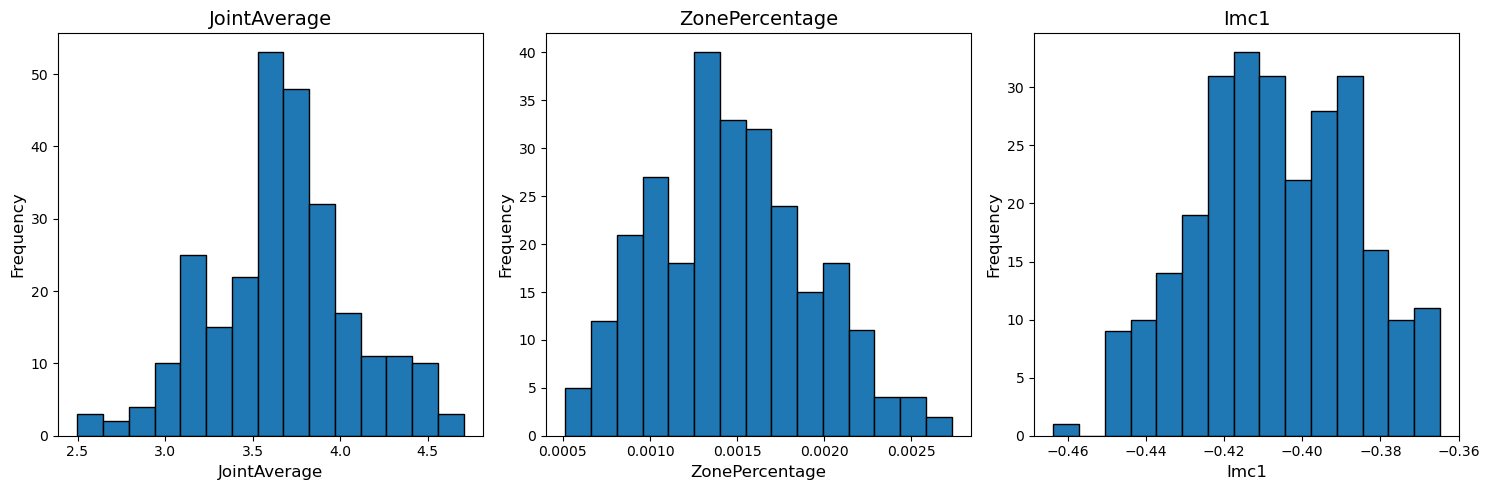

In [68]:
features=df.columns[:-1]

selected_features =np.random.choice(features, 3, replace=False)

plt.figure(figsize=(15, 5))

# Plot histograms for each selected feature
for i, feature in enumerate(selected_features):
    plt.subplot(1, 3, i + 1)
    plt.hist(
        df[feature], 
        bins=15,
        edgecolor='black')
    plt.title(f'{feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    
plt.tight_layout()
plt.show()

#### Exercise 1.2: Correlation Heatmap of Features

- Objective: Explore relationships and potential multicollinearity among features.
- Instructions: Generate a correlation matrix and plot it as a heatmap. Identify any features with strong correlations and discuss whether they might provide redundant information to a model.

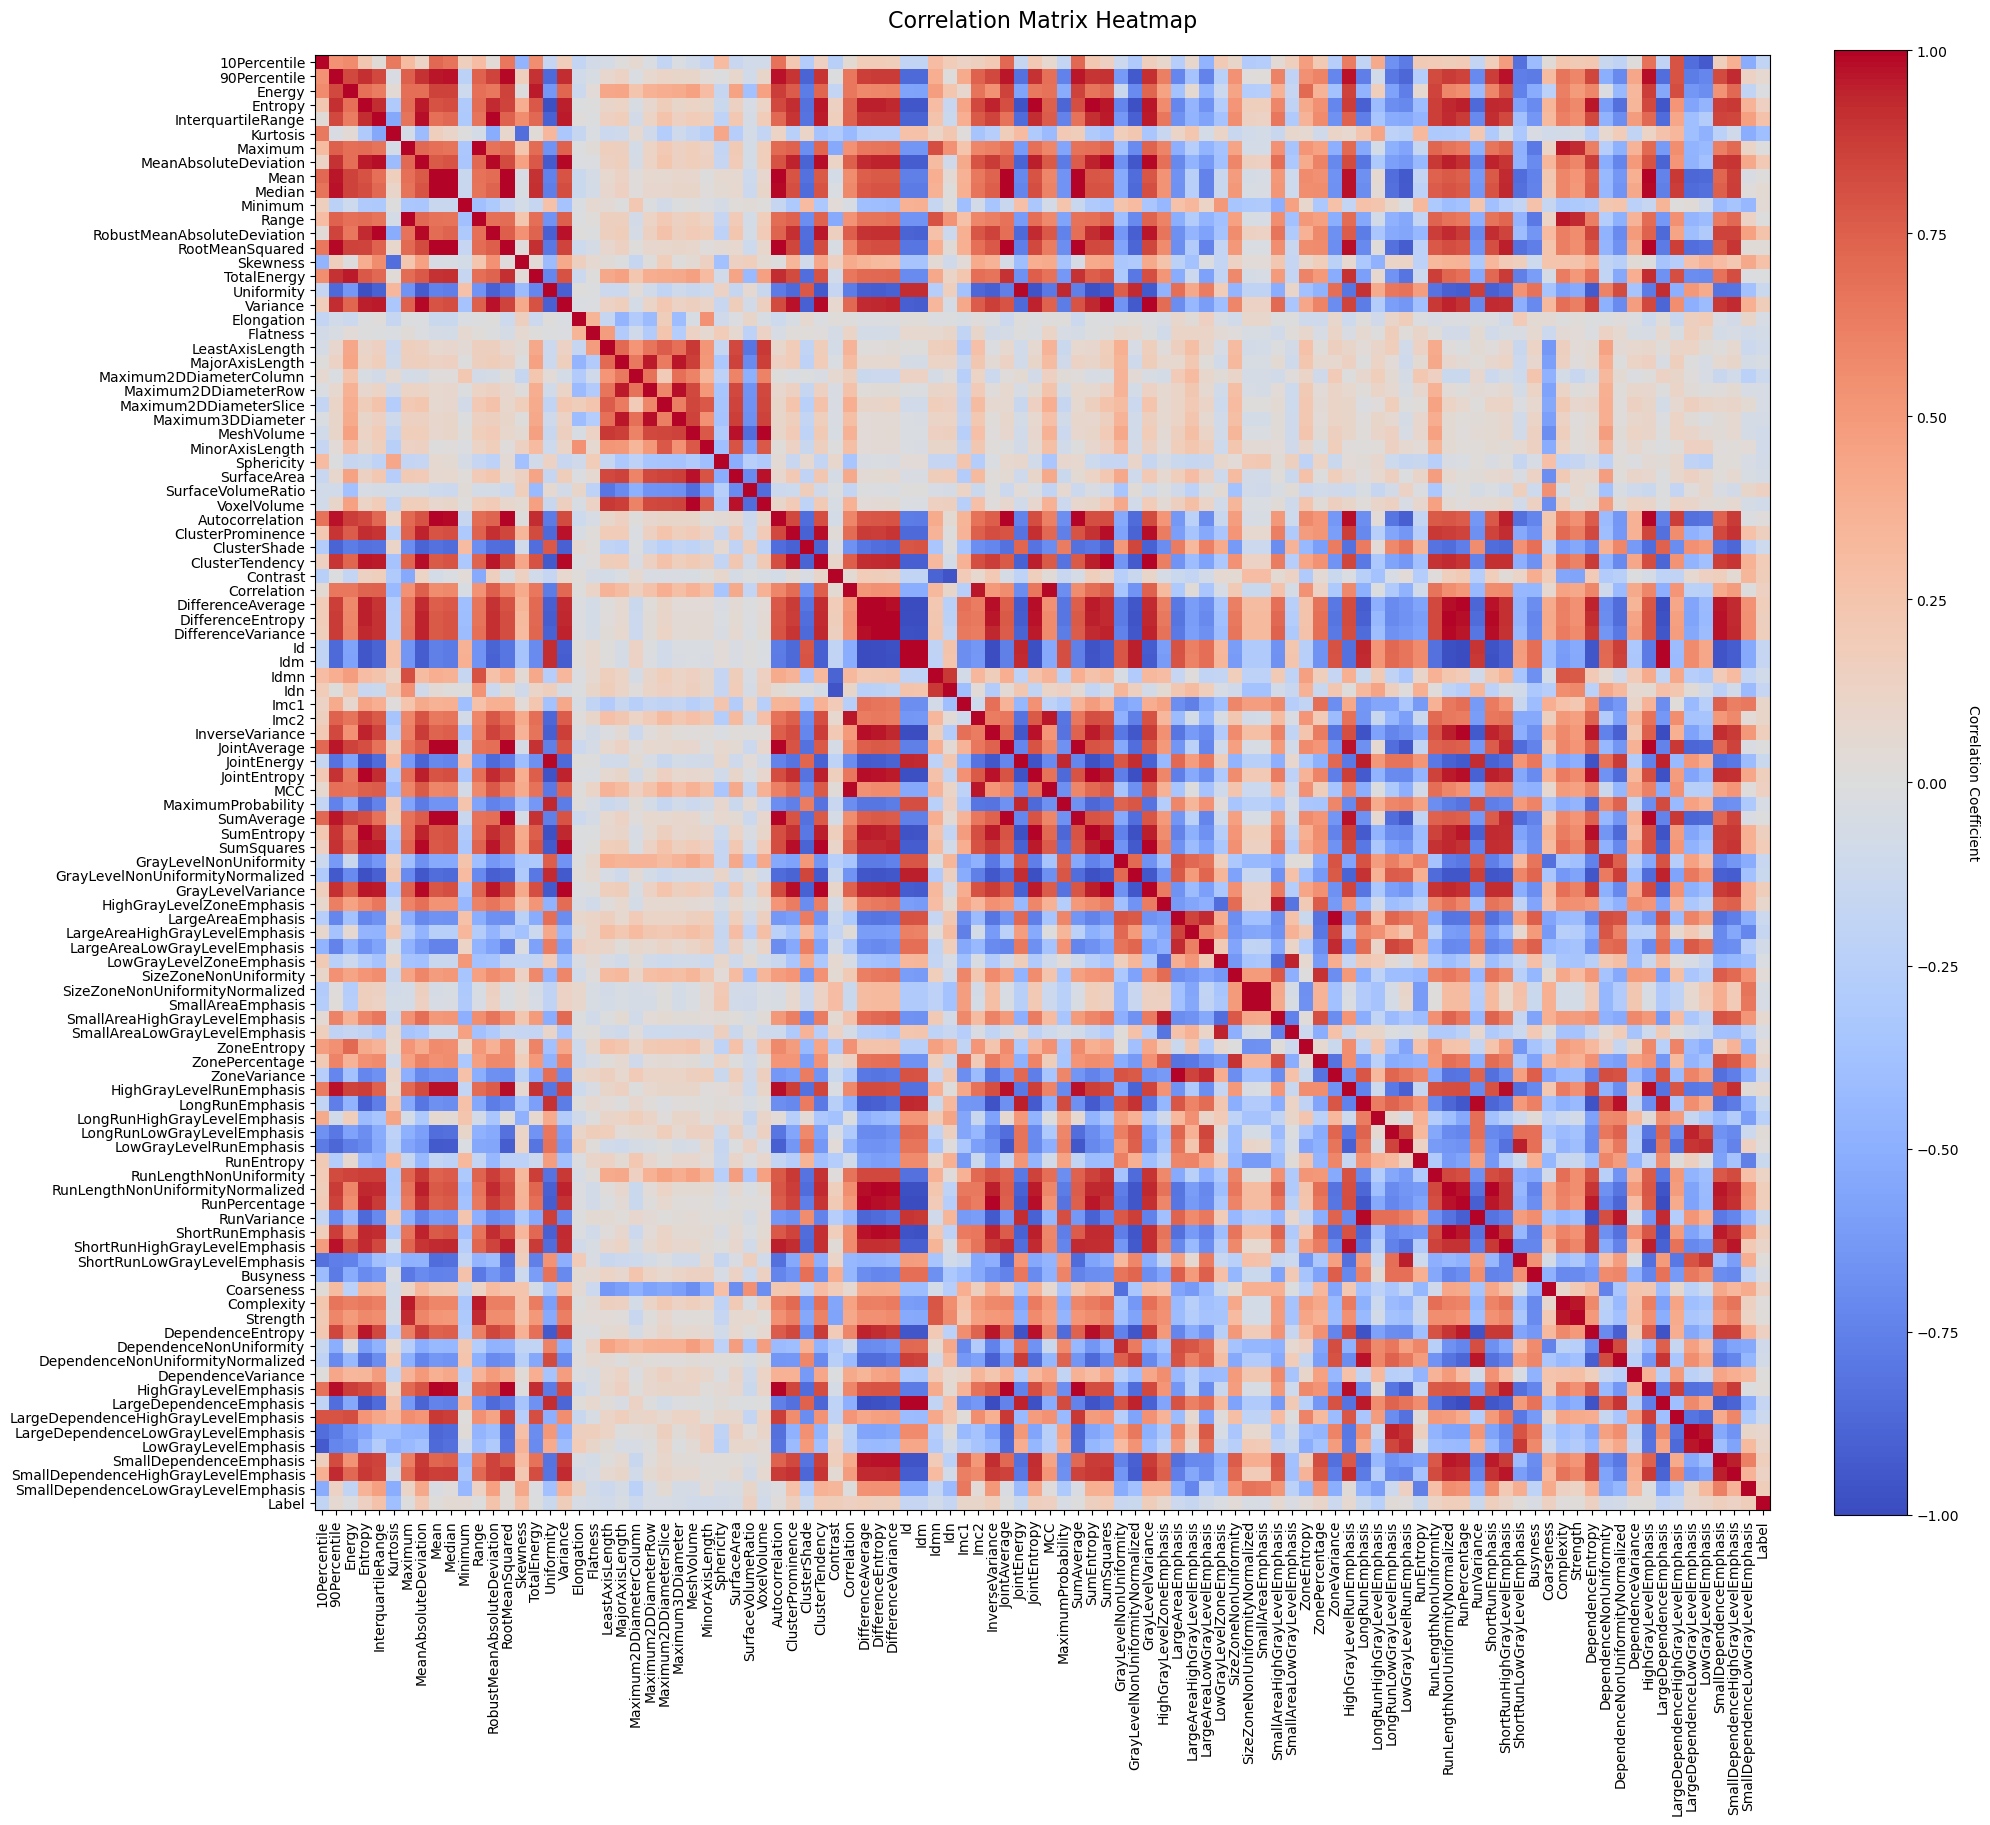

Top Strongly Correlated Feature Pairs (|correlation| > 0.95):
1. JointAverage and SumAverage have a correlation of 1.000000
2. MeshVolume and VoxelVolume have a correlation of 1.000000
3. LargeAreaEmphasis and ZoneVariance have a correlation of 0.999999
4. Autocorrelation and HighGrayLevelEmphasis have a correlation of 0.999970
5. ClusterTendency and SumSquares have a correlation of 0.999782
6. Id and Idm have a correlation of 0.999750
7. GrayLevelVariance and SumSquares have a correlation of 0.999608
8. DifferenceAverage and Idm have a correlation of -0.999320
9. Id and RunPercentage have a correlation of -0.999285
10. ClusterTendency and GrayLevelVariance have a correlation of 0.999231


In [69]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 20))  

im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)


cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=15)


tick_marks = np.arange(len(corr_matrix.columns))
plt.xticks(tick_marks, corr_matrix.columns, rotation=90, fontsize=10)
plt.yticks(tick_marks, corr_matrix.index, fontsize=10)


plt.title('Correlation Matrix Heatmap', fontsize=16, pad=20)


plt.tight_layout()


plt.show()


threshold = 0.95
strong_corr = set()  

for column in corr_matrix.columns:
    for row in corr_matrix.index:
        if abs(corr_matrix.loc[row, column]) > threshold and column != row:
            pair = tuple(sorted([column, row]))
            strong_corr.add((pair, corr_matrix.loc[row, column]))

strong_corr = list(strong_corr)
strong_corr.sort(key=lambda x: abs(x[1]), reverse=True)


print("Top Strongly Correlated Feature Pairs (|correlation| > 0.95):")
for idx, (pair, correlation) in enumerate(strong_corr[:10], start=1):
    print(f"{idx}. {pair[0]} and {pair[1]} have a correlation of {correlation:.6f}")

### 2. Dataset Size Reduction Effects

#### Exercise 2.1: Train Models with Reduced Dataset Sizes

- Objective: Examine how model performance changes with a smaller dataset.
- Instructions: Create three different subsets of the dataset, sampling 20%, 50%, and 80% of the full data. Train all the models that were taught in the notebook on each subset, then evaluate and compare the model performance metrics with those of the full dataset. Record your results in a table and discuss any observed trends or changes.
- How to find optimum `n_components` for PCA

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import xgboost as xgb

X = df.iloc[:, :-1]
y = df.iloc[:, -1]   


X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


sample_sizes = [0.20, 0.50, 0.80, 1.0]


models = {
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Bagging Classifier": BaggingClassifier(n_estimators=10, max_samples=0.5, max_features=0.5, random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, eval_metric='logloss', use_label_encoder=False, random_state=42),
    "Stacking Classifier": StackingClassifier(
        estimators=[
            ('svm', SVC(kernel='linear', probability=True, random_state=42)),
            ('log_reg', LogisticRegression(max_iter=1000, random_state=42)),
            ('dt', DecisionTreeClassifier(random_state=42)),
        ],
        final_estimator=RandomForestClassifier(random_state=42)
    )
}


transformations = {
    "None": None,
    "PCA": PCA(n_components=10, random_state=42),
    "LDA": LinearDiscriminantAnalysis(n_components=1),
    "T-SNE": TSNE(n_components=2, random_state=42)
}


scaler = StandardScaler()


results = []

# Loop over each sample size
for sample in sample_sizes:

    if sample == 1.0:
        X_subset = X_train_full
        y_subset = y_train_full
    else:

        X_subset, _, y_subset, _ = train_test_split(
            X_train_full, y_train_full, train_size=sample, random_state=42, stratify=y_train_full
        )
    

    scaler.fit(X_subset)
    X_subset_scaled = scaler.transform(X_subset)
    X_test_scaled = scaler.transform(X_test)
    

    for transform_name, transformer in transformations.items():
        if transformer is not None:

            if transform_name == "LDA":

                X_transformed = transformer.fit_transform(X_subset_scaled, y_subset)
                X_test_transformed = transformer.transform(X_test_scaled)
            elif transform_name == "T-SNE":

                combined_X = np.vstack((X_subset_scaled, X_test_scaled))
                transformed_combined = transformer.fit_transform(combined_X)
                X_transformed = transformed_combined[:len(X_subset_scaled)]
                X_test_transformed = transformed_combined[len(X_subset_scaled):]
            else:

                X_transformed = transformer.fit_transform(X_subset_scaled)
                X_test_transformed = transformer.transform(X_test_scaled)
        else:

            X_transformed = X_subset_scaled
            X_test_transformed = X_test_scaled
        
        # Loop over each model
        for model_name, model in models.items():

            model.fit(X_transformed, y_subset)
            

            y_pred = model.predict(X_test_transformed)
            

            accuracy = accuracy_score(y_test, y_pred)
            

            report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
            

            results.append({
                "Transformation": transform_name,
                "Model": model_name,
                "Sample Size (%)": f"{int(sample * 100)}%",
                "Accuracy": accuracy,  
                "Precision": report['weighted avg']['precision'],
                "Recall": report['weighted avg']['recall'],
                "F1-Score": report['weighted avg']['f1-score']
            })

results_df = pd.DataFrame(results)

pivot_df = results_df.pivot_table(index=['Transformation', 'Sample Size (%)'], columns='Model', values='Accuracy')


pivot_df

Model                           AdaBoost Classifier  Bagging Classifier  \
Transformation Sample Size (%)                                            
LDA            100%                        0.666667            0.666667   
               20%                         0.500000            0.481481   
               50%                         0.592593            0.592593   
               80%                         0.740741            0.759259   
None           100%                        0.666667            0.555556   
               20%                         0.592593            0.555556   
               50%                         0.574074            0.500000   
               80%                         0.518519            0.611111   
PCA            100%                        0.537037            0.500000   
               20%                         0.759259            0.611111   
               50%                         0.555556            0.574074   
               80%                         0.666667            0.462963   
T-SNE          100%                        0.555556            0.555556   
               20%                         0.537037            0.462963   
               50%                         0.555556            0.537037   
               80%                         0.611111            0.537037   

Model                           Decision Tree  Gradient Boosting  \
Transformation Sample Size (%)                                     
LDA            100%                  0.685185           0.685185   
               20%                   0.500000           0.500000   
               50%                   0.592593           0.592593   
               80%                   0.740741           0.740741   
None           100%                  0.574074           0.666667   
               20%                   0.500000           0.555556   
               50%                   0.592593           0.648148   
               80%                   0.666667           0.648148   
PCA            100%                  0.574074           0.592593   
               20%                   0.574074           0.574074   
               50%                   0.518519           0.574074   
               80%                   0.555556           0.611111   
T-SNE          100%                  0.518519           0.648148   
               20%                   0.537037           0.500000   
               50%                   0.648148           0.611111   
               80%                   0.592593           0.592593   

Model                           Logistic Regression       SVM  \
Transformation Sample Size (%)                                  
LDA            100%                        0.648148  0.648148   
               20%                         0.518519  0.518519   
               50%                         0.592593  0.500000   
               80%                         0.703704  0.703704   
None           100%                        0.666667  0.629630   
               20%                         0.518519  0.518519   
               50%                         0.611111  0.611111   
               80%                         0.666667  0.555556   
PCA            100%                        0.592593  0.611111   
               20%                         0.537037  0.500000   
               50%                         0.592593  0.574074   
               80%                         0.611111  0.537037   
T-SNE          100%                        0.537037  0.574074   
               20%                         0.555556  0.518519   
               50%                         0.574074  0.611111   
               80%                         0.500000  0.574074   

Model                           Stacking Classifier   XGBoost  
Transformation Sample Size (%)                                 
LDA            100%                        0.685185  0.685185  
               20%                         0.500000  0.518519

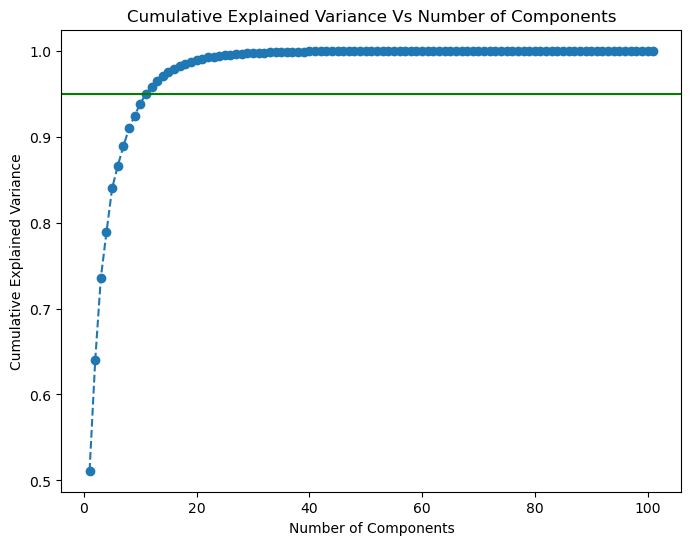

Optimal Number of Components for 95% Variance: 11


In [71]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.iloc[:, :-1])  

pca = PCA().fit(x_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Vs Number of Components')
plt.axhline(y=0.95, color='g')  
plt.show()

n_components_95 = (cumulative_variance >= 0.95).argmax() + 1

print(f"Optimal Number of Components for 95% Variance: {n_components_95}")


#### Exercise 2.2: Visualize Learning Curves

- Objective: Show how dataset size influences learning and performance.
- Instructions: Choose one model and plot a learning curve, showing accuracy as a function of training size. Interpret the learning curve to discuss how performance is affected by training data quantity and identify any signs of underfitting or overfitting.

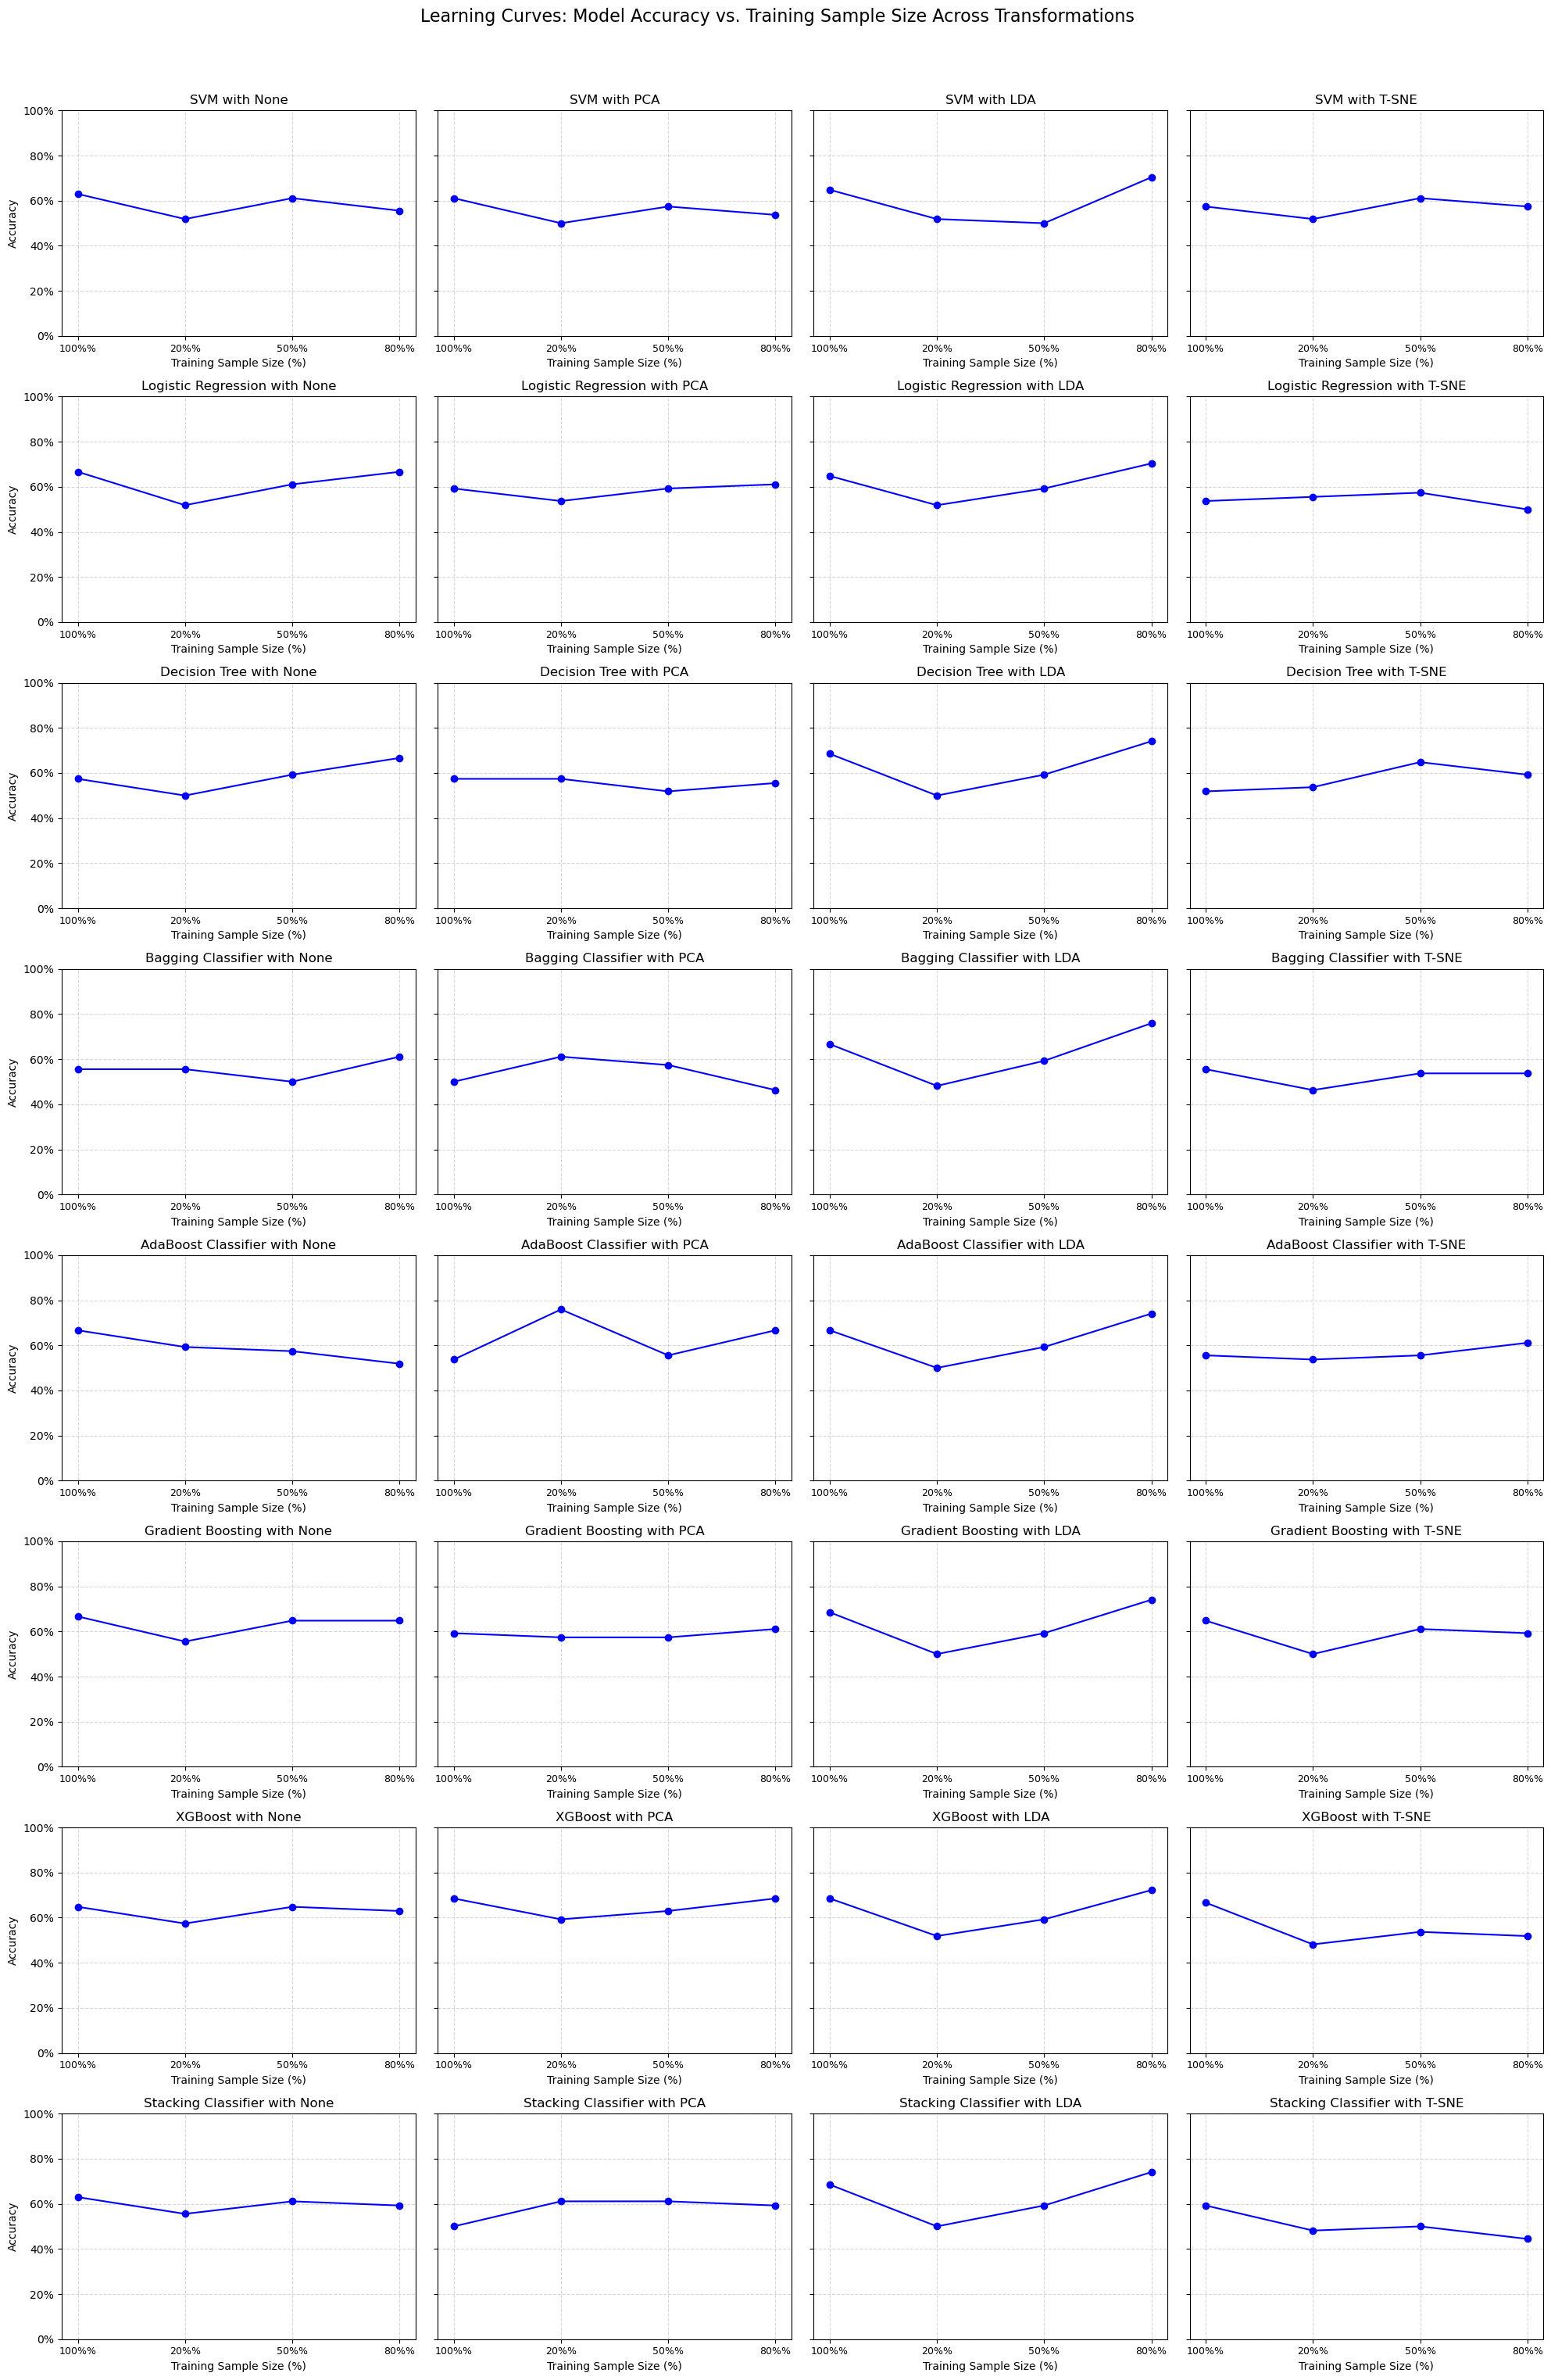

In [72]:
models = results_df['Model'].unique()
transformations = results_df['Transformation'].unique()

num_models = len(models)
num_transformations = len(transformations)

fig, axes = plt.subplots(
    nrows=num_models, 
    ncols=num_transformations, 
    figsize=(5 * num_transformations, 4 * num_models), 
    sharey=True
)

for i, model in enumerate(models):
    for j, transformation in enumerate(transformations):
        ax = axes[i][j]
        
        
        subset = results_df[
            (results_df['Model'] == model) &
            (results_df['Transformation'] == transformation)
        ].sort_values('Sample Size (%)')
        
        
        ax.plot(
            subset['Sample Size (%)'],
            subset['Accuracy'],
            marker='o',
            linestyle='-',
            color='b'
        )
        
        
        ax.set_title(f"{model} with {transformation}", fontsize=12)
        ax.set_xlabel('Training Sample Size (%)', fontsize=10)
        
        if j == 0:
            ax.set_ylabel('Accuracy', fontsize=10)
        else:
            ax.set_ylabel('')
        
        
        ax.set_xticks(subset['Sample Size (%)'])
        ax.set_xticklabels([f"{size}%" for size in subset['Sample Size (%)']], fontsize=9)
        
        
        ax.set_ylim(0, 1)
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        
        
        ax.grid(True, linestyle='--', alpha=0.5)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle(
    'Learning Curves: Model Accuracy vs. Training Sample Size Across Transformations', 
    fontsize=16
)
plt.show()

### 3. Cross-Validation and Model Stability

#### Exercise 3.1: Apply k-Fold Cross-Validation

- Objective: Understand how cross-validation provides stable accuracy estimates.
- Instructions: Implement 5, 10, and 20-fold cross-validation for all the models that were taught in the notebook and plot the accuracy across each fold. Discuss any observed variance among folds and what it implies about the model’s stability on this dataset.

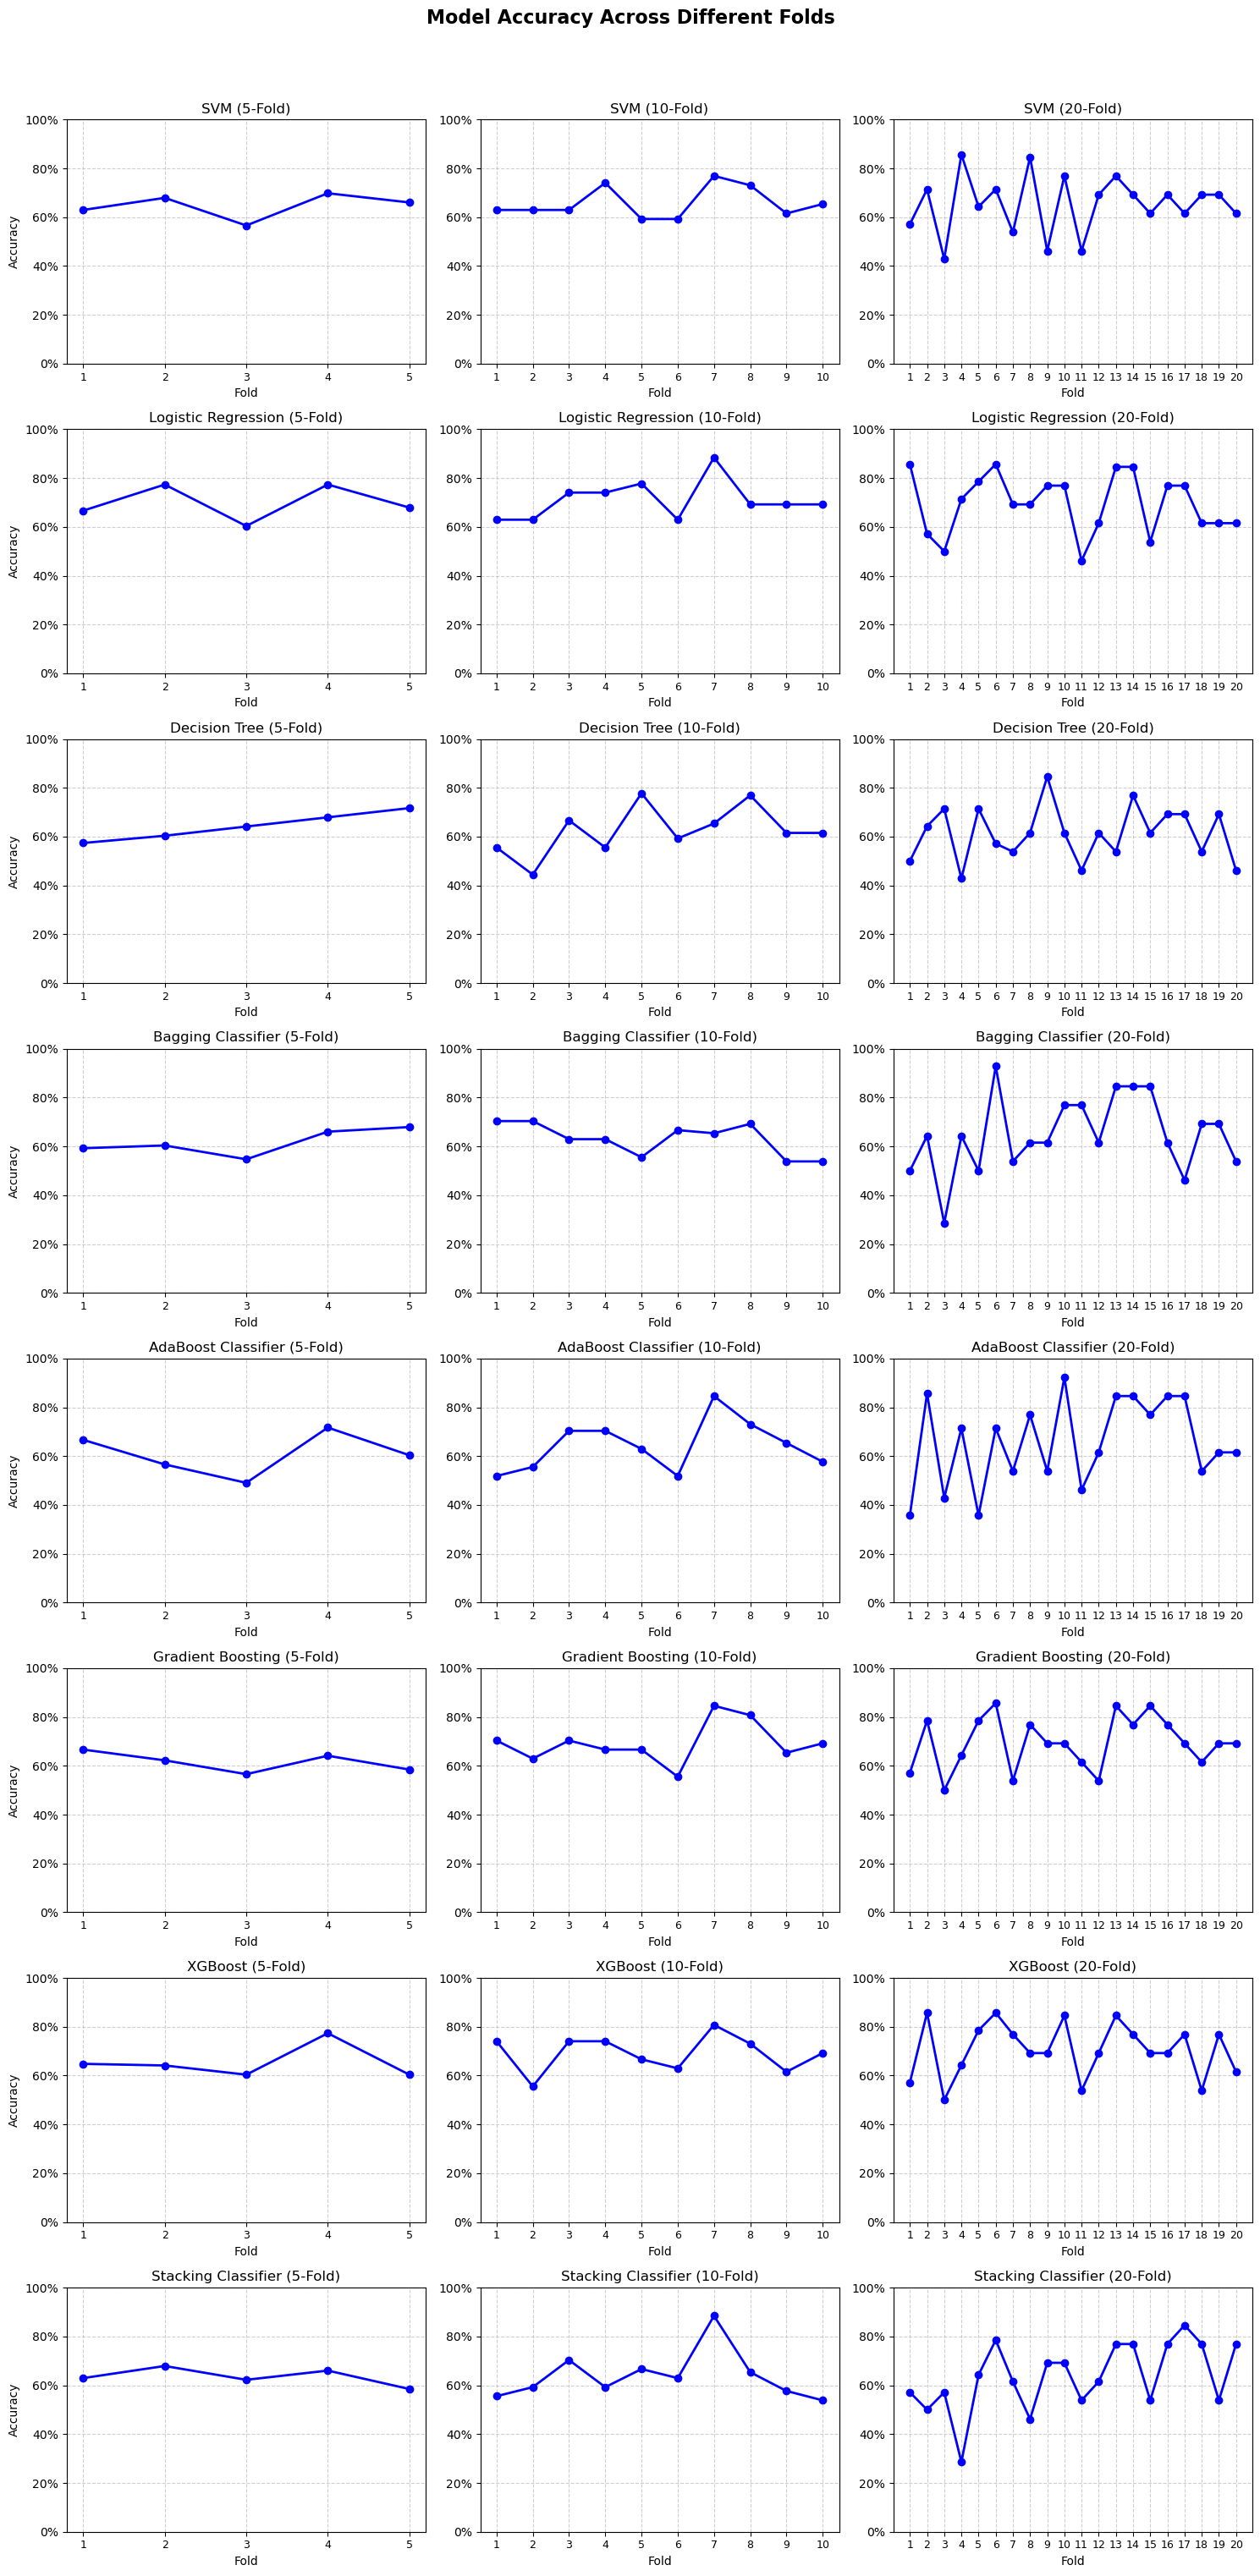

In [75]:
from sklearn.model_selection import KFold, cross_val_score

x = df.iloc[:, :-1]
y = df.iloc[:, -1] 

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

models = {
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Bagging Classifier": BaggingClassifier(n_estimators=10, max_samples=0.5, max_features=0.5, random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, eval_metric='logloss', use_label_encoder=False, random_state=42),
    "Stacking Classifier": StackingClassifier(
        estimators=[
            ('svm', SVC(kernel='linear', probability=True, random_state=42)),
            ('log_reg', LogisticRegression(max_iter=1000, random_state=42)),
            ('dt', DecisionTreeClassifier(random_state=42)),
        ],
        final_estimator=RandomForestClassifier(random_state=42)
    )
}

folds = [5, 10, 20]

num_models = len(models)
num_folds = len(folds)


fig_width = 5 * num_folds
fig_height = 4 * num_models
fig, axes = plt.subplots(num_models, num_folds, figsize=(fig_width, fig_height), squeeze=False)


for i, (model_name, model) in enumerate(models.items()):
    for j, fold in enumerate(folds):

        cv = KFold(n_splits=fold, shuffle=True, random_state=42)
        

        accuracies = cross_val_score(model, x_scaled, y, cv=cv, scoring='accuracy')
        

        ax = axes[i, j]
        

        ax.plot(np.arange(1, fold + 1), accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
        

        ax.set_title(f'{model_name} ({fold}-Fold)', fontsize=12)
        

        ax.set_xlabel('Fold', fontsize=10)
        

        if j == 0:
            ax.set_ylabel('Accuracy', fontsize=10)
        else:
            ax.set_ylabel('')
        

        ax.set_xticks(np.arange(1, fold + 1))
        ax.set_xticklabels([f"{k}" for k in range(1, fold + 1)], rotation=0, fontsize=9)
        

        ax.set_ylim(0, 1)
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        

        ax.grid(True, linestyle='--', alpha=0.6)
                

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


fig.suptitle('Model Accuracy Across Different Folds', fontsize=16, weight='bold')


plt.show()